In [1]:
# Import needed packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

In [2]:
# Dataset used can be found at following kaggle link: https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

In [3]:
# Importing excel file into pandas DataFrame 

song_ranks = pd.read_excel('top10s.xlsx', names=['ID', 'title', 'artist', 'genre', 'year', 'beats_per_minute', 'energy', 'danceability', 'loudness', 'liveness', 'valence', 'length', 'acousticness', 'speechiness', 'popularity'], index_col=0)

In [4]:
song_ranks.head(10)

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
ID,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76


In [5]:
# Looking into # of rows of data & # of attributes within dataset

song_ranks.shape

(603, 14)

In [6]:
# Checking datatypes of attributes 

song_ranks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
title               603 non-null object
artist              603 non-null object
genre               603 non-null object
year                603 non-null int64
beats_per_minute    603 non-null int64
energy              603 non-null int64
danceability        603 non-null int64
loudness            603 non-null int64
liveness            603 non-null int64
valence             603 non-null int64
length              603 non-null int64
acousticness        603 non-null int64
speechiness         603 non-null int64
popularity          603 non-null int64
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [7]:
# Changing datatype of year from int to string & datatype of genre from string to categorical

song_ranks.year = song_ranks.year.astype(str)
song_ranks.genre = song_ranks.genre.astype('category')

In [8]:
# Seeing descriptive statistics of numerical variables

song_ranks.describe()

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [9]:
# Checking which song had beats_per_minute value of 0, song has value of 0 for almost all attributes 

song_ranks[song_ranks.beats_per_minute == 0]

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
ID,,,,,,,,,,,,,,
443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


In [10]:
# Removing above song 

song_ranks_1 = song_ranks.drop(443, axis=0)

In [11]:
song_ranks_1.describe()

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,118.742525,70.621262,64.486711,-5.488372,17.803987,52.312292,224.671096,14.350498,8.372093,66.631229
std,24.339497,16.068471,13.129357,1.704657,13.093347,22.430640,34.158310,20.775203,7.481608,14.273775
min,43.000000,4.000000,23.000000,-15.000000,2.000000,4.000000,134.000000,0.000000,3.000000,0.000000
25%,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,220.500000,6.000000,5.000000,69.000000
75%,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.750000,17.000000,9.000000,76.000000
max,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [12]:
# Checked which songs have a acousticness value of 0, value is acceptable as Spotify's system does apply scores of 0 to acousticness 

song_ranks_1[song_ranks_1.acousticness == 0].head(5)

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
ID,,,,,,,,,,,,,,
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
19,Alejandro,Lady Gaga,dance pop,2010,99,80,63,-7,36,37,274,0,5,69
21,Meet Me Halfway,The Black Eyed Peas,dance pop,2010,130,63,80,-7,32,40,284,0,7,68
23,Take It Off,Kesha,dance pop,2010,125,68,73,-5,9,74,215,0,3,66


In [13]:
# Checked which songs have a popularity value of 0, this value is also an acceptable value as Spotify popularity scores range from 0 to 100

song_ranks_1[song_ranks_1.popularity == 0].head(5)

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
ID,,,,,,,,,,,,,,
51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
139,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0
268,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0
363,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0


In [14]:
# Looking into if songs are listed multiple times in the same year 

song_ranks_1.title.value_counts().head(20)

I Like It                                          2
Just the Way You Are                               2
Company                                            2
The Hills                                          2
Written in the Stars (feat. Eric Turner)           2
Runnin' (Lose It All)                              2
Marry You                                          2
Stitches                                           2
First Time                                         2
Castle Walls (feat. Christina Aguilera)            2
Love Yourself                                      2
Hello                                              2
Here                                               2
Say Something                                      2
We Are Never Ever Getting Back Together            2
All I Ask                                          2
A Little Party Never Killed Nobody (All We Got)    2
Sugar                                              2
Kissing Strangers                             

In [15]:
repeat_titles = ("All I Ask", "We Are Never Ever Getting Back Together", "Stitches", "Written in the Stars (feat. Eric Turner)", "First Time", "Castle Walls (feat. Christina Aguilera)", "Say Something", "Marry You", "Love Yourself", "I Like It", "Just the Way You Are", "The Hills", "Sugar", "Runnin' (Lost It All)", "Company", "A Little Party Never Killed Nobody (All We Got)", "Here", "Kissing Strangers", "Hello")

In [16]:
song_ranks_1[song_ranks_1.title.isin(repeat_titles)].sort_values(by=['title']).head(10)

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
ID,,,,,,,,,,,,,,
240,A Little Party Never Killed Nobody (All We Got),Fergie,dance pop,2014,130,62,76,-6,9,52,241,1,18,65
179,A Little Party Never Killed Nobody (All We Got),Fergie,dance pop,2013,130,62,76,-6,9,52,241,1,18,65
399,All I Ask,Adele,british soul,2016,142,28,59,-5,15,34,272,88,3,71
474,All I Ask,Adele,british soul,2017,142,28,59,-5,15,34,272,88,3,71
96,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2011,80,86,45,-5,26,58,329,7,39,49
49,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2010,80,86,45,-5,26,58,329,7,39,49
302,Company,Justin Bieber,canadian pop,2015,95,80,59,-5,8,43,208,13,6,72
397,Company,Justin Bieber,canadian pop,2016,95,80,59,-5,8,43,208,13,6,72
475,First Time,Kygo,edm,2017,90,59,63,-7,10,68,194,20,11,71


In [17]:
# Removing song "Sugar" by Maroon 5 to maintain consistency as it is listed twice in year 2015 with different popularity values
# Removing one row each for songs "A Little Party Never Killed Nobody", "All I Ask", "Castle Walls", "Company", "First Time", "Here", "Just the Way You Are", "Kissing Strangers", "Love Yourself", "Marry You", "Stitches", "The Hills", "We Are Never Ever Getting Back Together", "Written in the Stars"
# Both rows for each song above have all of the same values for every attribute except for year which is not being used for in the analysis

song_ranks_2 = song_ranks_1.drop([240, 399, 96, 302, 475, 316, 55, 489, 272, 65, 379, 323, 275, 271, 153, 94], axis=0)

In [18]:
# 17 rows in total removed from original dataset

song_ranks_2.shape

(586, 14)

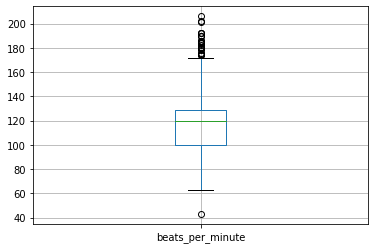

In [19]:
# Looking into distributions of numeric variables using boxplots

song_ranks_2.boxplot(column='beats_per_minute')

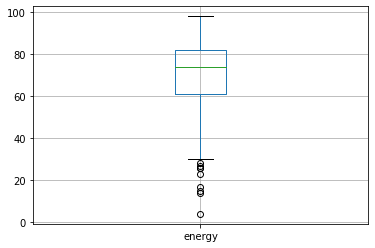

In [20]:
song_ranks_2.boxplot(column='energy')

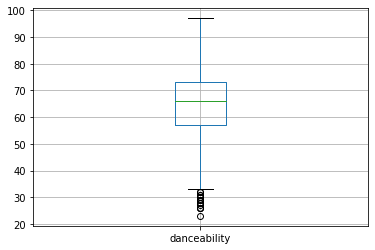

In [21]:
song_ranks_2.boxplot(column='danceability')

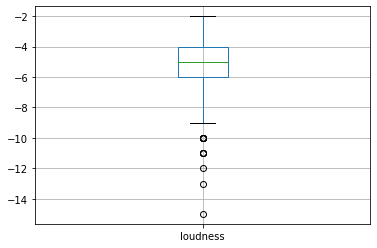

In [22]:
song_ranks_2.boxplot(column='loudness')

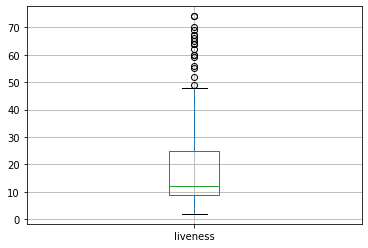

In [23]:
song_ranks_2.boxplot(column='liveness')

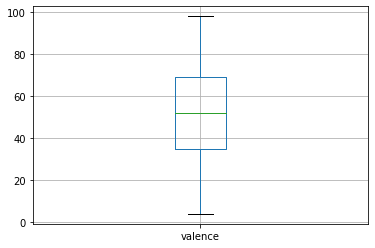

In [24]:
song_ranks_2.boxplot(column='valence')

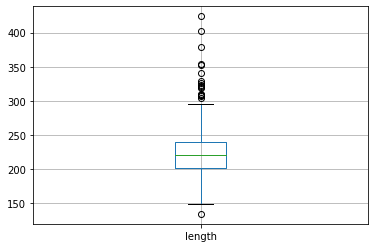

In [25]:
song_ranks_2.boxplot(column='length')

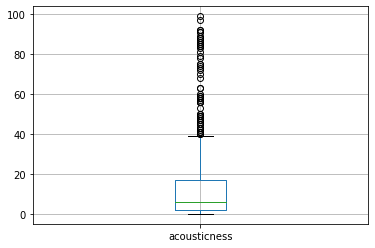

In [26]:
song_ranks_2.boxplot(column='acousticness')

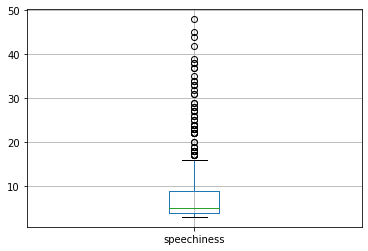

In [27]:
song_ranks_2.boxplot(column='speechiness')

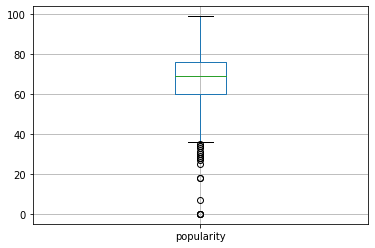

In [28]:
song_ranks_2.boxplot(column='popularity')

In [29]:
# Seeing how each numeric attribute correlates to the popularity of a song through scatterplots & redisual plots 
# Plotting histograms of attributes to see the frequncies of each numeric attribute in songs within dataset

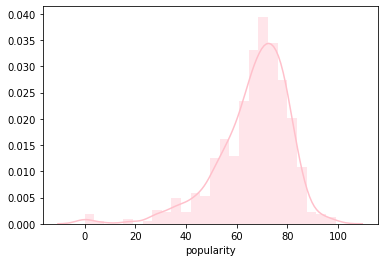

In [30]:
# Distribution of popularity is slightly left skewed with a popularity rating around 70 being the most frequent
sns.distplot(song_ranks_2['popularity'], color='pink')

Text(0.5, 1.0, 'beats_per_minute vs popularity')

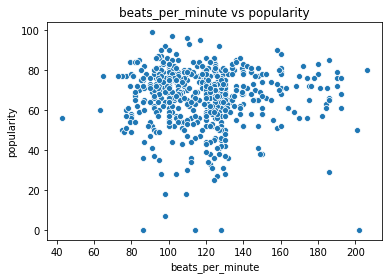

In [31]:
# Plotting beats_per_minute vs popularity, no correlation seen  

sns.scatterplot(x=song_ranks_2['beats_per_minute'], y=song_ranks_2['popularity'])
plt.title('beats_per_minute vs popularity')

Text(0.5, 1.0, 'beats_per_minute vs popularity')

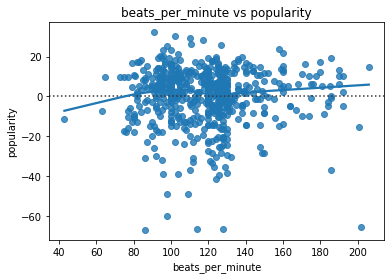

In [32]:
sns.residplot(x=song_ranks_2['beats_per_minute'], y=song_ranks_2['popularity'], lowess=True )
plt.title('beats_per_minute vs popularity')

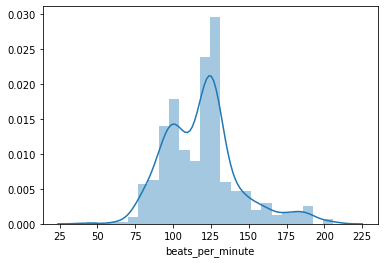

In [33]:
# Distribution of beats_per_minute 
# Bi-modal, beats_per_minute around 125 the most frequent  

sns.distplot(song_ranks_2['beats_per_minute'])

Text(0.5, 1.0, 'energy vs popularity')

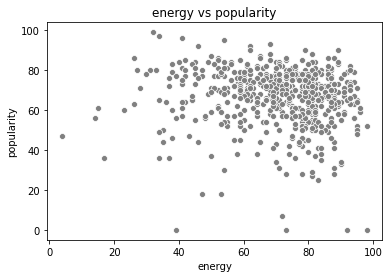

In [34]:
# Plotting energy vs popularity, no correlation seen

sns.scatterplot(x=song_ranks_2['energy'], y=song_ranks_2['popularity'], color='gray' )
plt.title('energy vs popularity')

Text(0.5, 1.0, 'energy vs popularity')

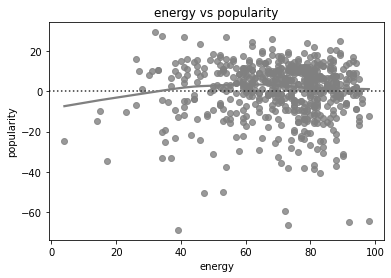

In [35]:
sns.residplot(x=song_ranks_2['energy'], y=song_ranks_2['popularity'], color='gray', lowess=True )
plt.title('energy vs popularity')

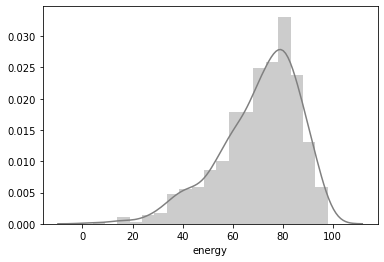

In [36]:
# Distribution of energy 
# Left skewed, energy around 80 the most frequent 

sns.distplot(song_ranks_2['energy'], color='gray')

Text(0.5, 1.0, 'danceability vs popularity')

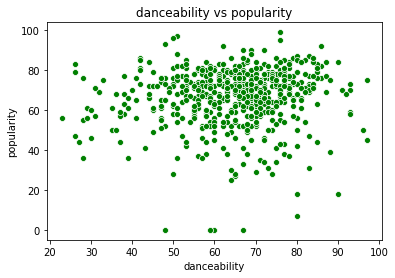

In [37]:
# Plotting danceability vs popularity, no correlation seen 

sns.scatterplot(x=song_ranks_2['danceability'], y=song_ranks_2['popularity'], color='green' )
plt.title('danceability vs popularity')

Text(0.5, 1.0, 'danceability vs popularity')

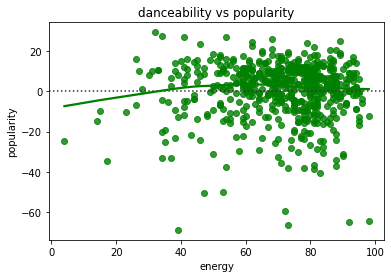

In [38]:
sns.residplot(x=song_ranks_2['energy'], y=song_ranks_2['popularity'], color='green', lowess=True)
plt.title('danceability vs popularity')

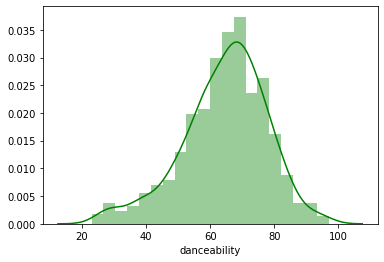

In [39]:
# Distribution of danceability 
# Close to normal distribution with danceability around 70 being the most frequent

sns.distplot(song_ranks_2['danceability'], color='green')

Text(0.5, 1.0, 'loudness vs popularity')

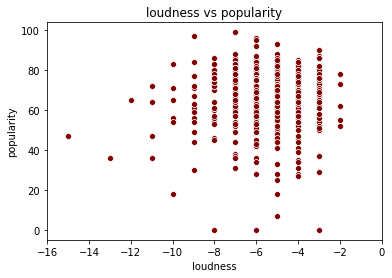

In [40]:
# Plotting loudness vs popularity, no correlation seen 

sns.scatterplot(x=song_ranks_2['loudness'], y=song_ranks_2['popularity'], color='maroon')
plt.xlim([-16,0])
plt.title('loudness vs popularity')

Text(0.5, 1.0, 'loudness vs popularity')

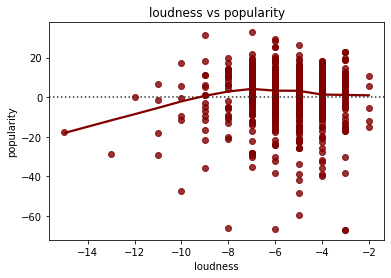

In [41]:
sns.residplot(x=song_ranks_2['loudness'], y=song_ranks_2['popularity'], color='maroon', lowess=True)
plt.title('loudness vs popularity')

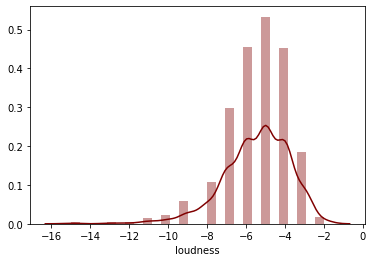

In [42]:
# Distribution of loudness
# Left skewed, loudness of -5 the most common 

sns.distplot(song_ranks_2['loudness'], color='maroon')

Text(0.5, 1.0, 'liveness vs popularity')

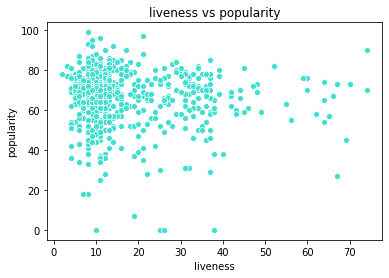

In [43]:
# Plotting liveness vs popularity, no correlation seen 

sns.scatterplot(x=song_ranks_2['liveness'], y=song_ranks_2['popularity'], color='turquoise')
plt.title('liveness vs popularity')

Text(0.5, 1.0, 'liveness vs popularity')

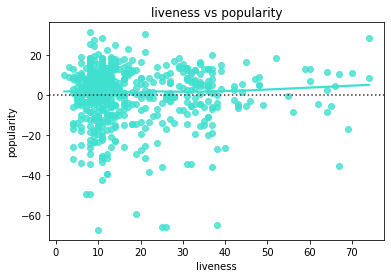

In [44]:
sns.residplot(x=song_ranks_2['liveness'], y=song_ranks_2['popularity'], color='turquoise', lowess=True)
plt.title('liveness vs popularity')

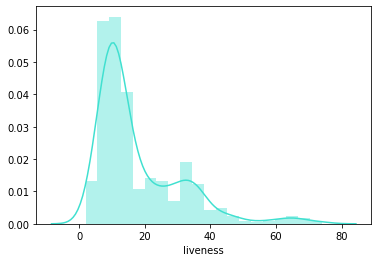

In [45]:
# Distributon of liveness
# Right skewed, liveness around 10 the most frequent 

sns.distplot(song_ranks_2['liveness'], color='turquoise')

Text(0.5, 1.0, 'valence vs popularity')

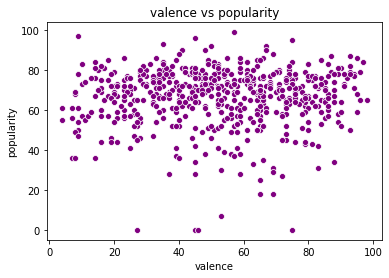

In [46]:
# Plotting valence vs popularity, no correlation seen 

sns.scatterplot(x=song_ranks_2['valence'], y=song_ranks_2['popularity'], color='purple')
plt.title('valence vs popularity')

Text(0.5, 1.0, 'valence vs popularity')

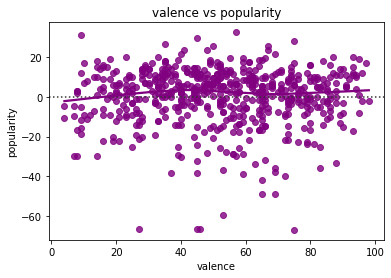

In [47]:
sns.residplot(x=song_ranks_2['valence'], y=song_ranks_2['popularity'], color='purple', lowess=True)
plt.title('valence vs popularity')

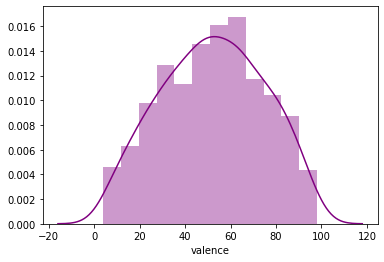

In [48]:
# Distribution of valence 
# Close to normal distribution w/ wide spread, valence close to 60 is most frequent 

sns.distplot(song_ranks_2['valence'], color='purple')

Text(0.5, 1.0, 'length vs popularity')

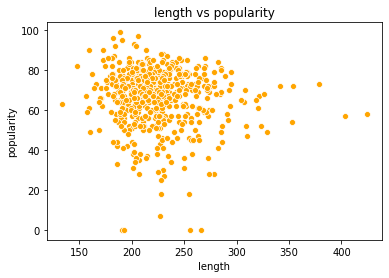

In [49]:
# Plotting length vs popularity, no correlation seen

sns.scatterplot(x=song_ranks_2['length'], y=song_ranks_2['popularity'], color='orange')
plt.title('length vs popularity')

Text(0.5, 1.0, 'length vs popularity')

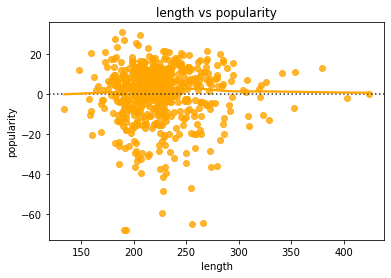

In [50]:
sns.residplot(x=song_ranks_2['length'], y=song_ranks_2['popularity'], color='orange', lowess=True)
plt.title('length vs popularity')

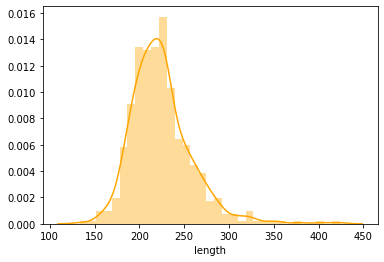

In [51]:
# Distribution of length 
# Right skewed, length around 225 most common  

sns.distplot(song_ranks_2['length'], color='orange')

Text(0.5, 1.0, 'acousticness vs popularity')

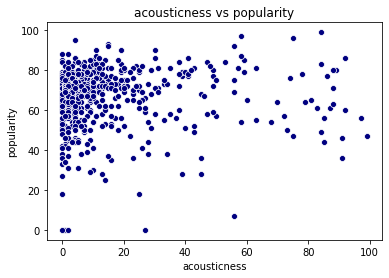

In [52]:
# Plotting acousticness vs popularity, no significant correlation seen 

sns.scatterplot(x=song_ranks_2['acousticness'], y=song_ranks_2['popularity'], color='navy')
plt.title('acousticness vs popularity')

Text(0.5, 1.0, 'acousticness vs popularity')

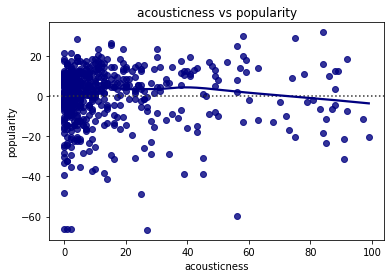

In [53]:
sns.residplot(x=song_ranks_2['acousticness'], y=song_ranks_2['popularity'], color='navy', lowess=True)
plt.title('acousticness vs popularity')

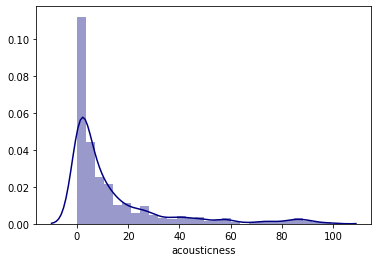

In [54]:
# Distribution of acousticness 
# Right skewed, acousticness of 0 very frequent 

sns.distplot(song_ranks_2['acousticness'], color='navy')

Text(0.5, 1.0, 'speechiness vs popularity')

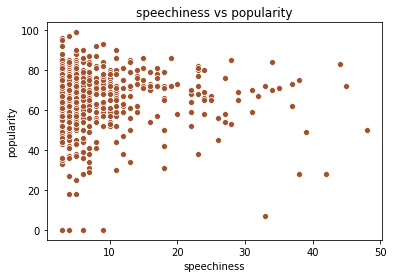

In [55]:
# Plotting speechiness vs popularity, no correlation seen 

sns.scatterplot(x=song_ranks_2['speechiness'], y=song_ranks_2['popularity'], color='sienna')
plt.title('speechiness vs popularity')

Text(0.5, 1.0, 'speechiness vs popularity')

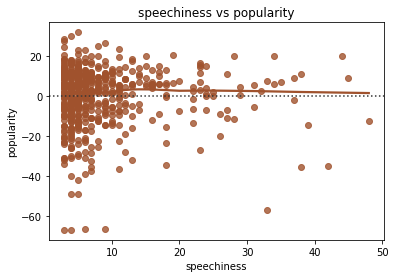

In [56]:
sns.residplot(x=song_ranks_2['speechiness'], y=song_ranks_2['popularity'], color='sienna', lowess=True)
plt.title('speechiness vs popularity')

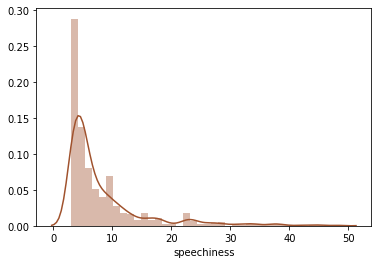

In [57]:
# Distribution of speechiness
# Right skewed, speechiness close to 5 most common

sns.distplot(song_ranks_2['speechiness'], color='sienna')

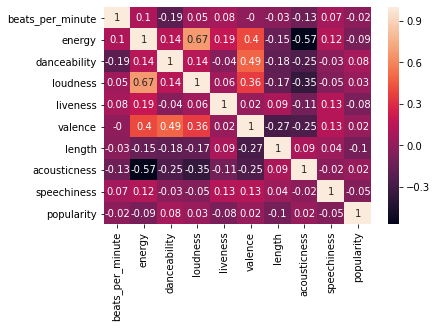

In [58]:
# Correlation matrix to see strength of relationship between all numerical variables
# Correlation detected between energy & acousticness (negative) & energy & loudness (positive)
# Very surprising to see no strong correlations present between other variables 

correlation_matrix = song_ranks_2.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

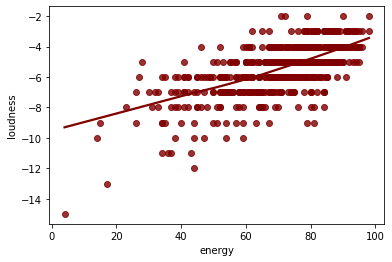

In [59]:
# Positvie correlation between energy & loudness 

sns.regplot(x=song_ranks_2['energy'], y=song_ranks_2['loudness'], color='maroon', lowess=True)

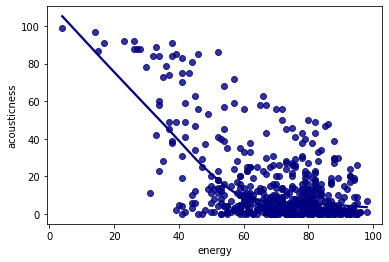

In [60]:
# Negative corrleation between energy & acousticness

sns.regplot(x=song_ranks_2['energy'], y=song_ranks_2['acousticness'], color='navy', lowess=True)

In [ ]:
# Seeing number of songs per year in dataset
# Range of songs included per year from 31 (2019) to 89 (2015)
# Since purpose is to predict the popularity of future songs, I will not be taking 'year' into consideration as a predictor variable 

song_ranks_2.groupby('year').count()

In [61]:
# Looking into which artists had the most number of songs in dataset

song_ranks_2['artist'].value_counts().head(15)

Katy Perry           17
Rihanna              15
Lady Gaga            14
Justin Bieber        14
Maroon 5             13
Pitbull              11
Bruno Mars           11
The Chainsmokers     11
Ed Sheeran           11
Calvin Harris        10
Shawn Mendes         10
Jennifer Lopez       10
Britney Spears        9
Kesha                 9
Justin Timberlake     9
Name: artist, dtype: int64

In [62]:
# Seeing which genres had the most number of songs
# Songs belonging to/associated with the pop genre make up a disproportionate amount of the dataset
# Could be difficult to differentiate effect of genre within this dataset due to disproportion so it will not be used as a predictor variable 

song_ranks_2['genre'].value_counts().head(10)

dance pop        324
pop               55
canadian pop      31
boy band          15
barbadian pop     15
electropop        13
big room          10
neo mellow         9
british soul       9
art pop            8
Name: genre, dtype: int64

In [63]:
# Changing datatype of title to string as certain titles contain numeric & non-letter characters

song_ranks_2.title = song_ranks_2.title.astype(str)

In [64]:
song_ranks_2.title.sort_values().head(10)

ID
200                            #Beautiful
241                               #SELFIE
174                            #thatPOWER
570    ...Ready For It? - BloodPop® Remix
88                                    1+1
482                             24K Magic
559              2U (feat. Justin Bieber)
31                                      3
298                                 43776
373                               7 Years
Name: title, dtype: object

In [65]:
# Looking into the most frequently occuring words in song titles
# Songs with a feature by another artist or songs relating to 'you', 'me', 'love' occur the most within this dataset 

popular_words = pd.Series(' '.join(song_ranks_2['title']).lower().split()).value_counts()

In [66]:
popular_words.head(10)

(feat.    77
you       56
the       56
-         50
me        44
love      39
i         29
&         25
it        23
like      20
dtype: int64

In [67]:
# Seeing exact descriptive statistics of popularity 

song_ranks_2['popularity'].mean()

66.51877133105802

In [68]:
song_ranks_2['popularity'].std()

14.363908564768266

In [69]:
song_ranks_2['popularity'].quantile([0.25, 0.75])

0.25    60.0
0.75    76.0
Name: popularity, dtype: float64

In [ ]:
# Very high proportion of songs within dataset have popularity above 50 
# 518 out of 586 songs have popularity score above 50

pop_over_50 = song_ranks_2[song_ranks_2['popularity'] > 50]
pop_over_50.count()

In [ ]:
# More even distribution between songs with popularity score over 70 & popularity score less than 70
# 269 songs have popularity score above 70

pop_over_70 = song_ranks_2[song_ranks_2['popularity'] > 70]
pop_over_70.count()

In [ ]:
# Can separate about another 100 songs by increasing popularity level to 75
# 166 songs hvae popularity score above 75 

pop_over_75 = song_ranks_2[song_ranks_2['popularity'] > 75]
pop_over_75.count()

In [70]:
# Finding 95% confidence interval for popularity using bootstrapping

np.random.seed(77)
num_replicates = 10000

def bootstrap_replicate(data,func):
    bootstrap_sample = np.random.choice(data,size=len(data))
    return func(bootstrap_sample)

popularity_replicates = np.empty(num_replicates)

for i in range(num_replicates):
    popularity_replicates[i] = bootstrap_replicate(song_ranks_2['popularity'],np.mean)

popularity_confidence_interval = np.percentile(popularity_replicates,[2.5,97.5])
popularity_confidence_interval

array([65.35324232, 67.6774744 ])

In [71]:
# Importing packages for regression models 

import statsmodels.api as sm 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
# Creating X dataframe with all numeric attributes & Y dataframe containing the dependent variable 'popularity'

X_numeric = song_ranks_2.drop(['popularity', 'title', 'artist', 'genre', 'year'], axis=1)
Y_numeric = song_ranks_2.popularity

In [73]:
# Running standard linear regression to see how entire dataset of numerical attributes does in explaining 'popularity'
# Only 4% of popularity explained by the numericla attributes 
# Remember there is correlation between 'energy' & 'loudness' & 'energy' & 'danceability' but keeping correlated attributes in model, RMSE is same or lower when including

reg_normalize = LinearRegression(normalize=True)
reg_normalize.fit(X_numeric, Y_numeric)
reg_normalize.score(X_numeric, Y_numeric)

0.03961232747390275

In [178]:
# Running standard linear regression using statsmodels to see which attibutes are significant in this model (adding constant term)
# Energy, loudness & length are significant w/ loudness having the largest coefficient value 

X_constant = sm.add_constant(X_numeric)
reg_normal_model = sm.OLS(Y_numeric,X_constant)
reg_normal_results = reg_normal_model.fit()
reg_normal_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.139
Date:                Tue, 25 Aug 2020   Prob (F-statistic):             0.0248
Time:                        16:01:37   Log-Likelihood:                -2382.9
No. Observations:                 586   AIC:                             4786.
Df Residuals:                     576   BIC:                             4830.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.3680     58.029     -0.661      0.509    -152.342      75.606
x1            56.5685     27.729      2.040      0.042       2.106     111.031
x2             0.2087     17.976      0.012      0.991     -35.098      35.515
x3            57.4694     16.393      3.506      0.000      25.272      89.666
x4           101.3866    114.782      0.883      0.377    -124.055     326.828
x5            -3.1074     14.731     -0.211      0.833     -32.041      25.826
x6            20.4391     15.628      1.308      0.191     -10.255      51.133
x7            81.7842     47.735      1.713      0.087     -11.971     175.540
x8            22.4637     13.100      1.715      0.087      -3.266      48.194
x9            -2.7967     23.949     -0.117      0.907     -49.836      44.242
==============================================================================
Omnibus:                      173.523   Durbin-Watson:                   0.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.050
Skew:                          -1.446   Prob(JB):                    5.23e-108
Kurtosis:                       6.446   Cond. No.                         276.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Splitting dataset to see how linear regression using numeric attributes runs on unseen data & calculating RMSE 

X_train, X_test, Y_train, Y_test = train_test_split(X_numeric, Y_numeric, test_size=0.3, random_state=77)
reg_normalize_split = LinearRegression(normalize=True)
reg_normalize_split.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [76]:
# Popularity off by an average of 13 popularity score when using only numeric attributes to predict 

Y_pred = reg_normalize_split.predict(X_test)
reg_normalize_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
reg_normalize_rmse

13.295086003091567

In [77]:
# Seeing how attributes that are significant in above model (energy, loudness, length) do in explaining popularity themselves 

X_energy_loudness_length = song_ranks_2[['energy', 'loudness', 'length']]

In [179]:
# Above 3 attributes explain 3% out of the 4% of variability seen when using all numeric attributes 

X_energy_loudness_length_constant = sm.add_constant(X_energy_loudness_length)
reg_energy_loudness_length_model = sm.OLS(Y_numeric, X_energy_loudness_length_constant)
reg_energy_loudness_length_results = reg_energy_loudness_length_model.fit()
reg_energy_loudness_length_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     6.279
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           0.000338
Time:                        16:01:43   Log-Likelihood:                -2383.2
No. Observations:                 586   AIC:                             4774.
Df Residuals:                     582   BIC:                             4792.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.2082      6.699     14.212      0.000      82.051     108.365
energy        -0.1743      0.049     -3.543      0.000      -0.271      -0.078
loudness       1.1569      0.463      2.496      0.013       0.247       2.067
length        -0.0447      0.017     -2.569      0.010      -0.079      -0.011
==============================================================================
Omnibus:                      171.131   Durbin-Watson:                   0.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.080
Skew:                          -1.430   Prob(JB):                    3.43e-105
Kurtosis:                       6.394   Cond. No.                     2.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# Splitting dataset to see how linear regression using energy, loudness, length runs on unseen data & calculating RMSE 
# Smilar RMSE as model with all numeric attributes

X_train, X_test, Y_train, Y_test = train_test_split(X_energy_loudness_length, Y_numeric, test_size=0.3, random_state=77)
reg_energy_loudness_length_split = LinearRegression(normalize=True)
reg_energy_loudness_length_split.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [80]:
Y_pred = reg_energy_loudness_length_split.predict(X_test)
reg_energy_loudness_length_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
reg_energy_loudness_length_rmse

13.077441469851156

In [81]:
# Transforming all attributes to run polynomial regression of degree 2
# Will see below that using polynomial transformation &/or interactions of attributes may not be needed or appropriate 

polynomials = PolynomialFeatures(degree=2)
X_poly = polynomials.fit_transform(X_numeric)
reg_poly = LinearRegression(normalize=True)
reg_poly.fit(X_poly, Y_numeric)
reg_poly.score(X_poly, Y_numeric)

0.15174526474508587

In [82]:
# Listing coefficients & their values within polynomial model 

# x0: beats_per_minute
# x1: energy
# x2: danceability 
# x3: loudness 
# x4: liveness
# x5: valence 
# x6: length 
# x7: acousticness
# x8: speechiness

polynomials.get_feature_names()
poly_coef = pd.Series(reg_poly.coef_, index=polynomials.get_feature_names())
poly_coef.head(20)

1       -6.479826e-12
x0      -2.124775e-01
x1       2.810919e-01
x2       9.400093e-01
x3       1.743130e+00
x4       3.452327e-03
x5      -2.969488e-01
x6      -5.079043e-01
x7       5.407896e-01
x8       2.547447e+00
x0^2    -3.118205e-04
x0 x1    3.115517e-03
x0 x2   -9.743187e-04
x0 x3    3.415750e-03
x0 x4   -2.347380e-03
x0 x5    8.582225e-06
x0 x6    7.515074e-04
x0 x7    1.217844e-03
x0 x8    4.625865e-06
x1^2    -6.743282e-03
dtype: float64

In [83]:
# Looking at which variables from polynomial model are significant
# x25, x33, x37, x54 are shown to be significant & checking with the above list 3 of these variables are terms that caputre interactions between attributes, do not think these interactions should be included as separate variables in model
# 4th variable corresponds to speechiness^2 but speechiness attribute showed no signs of having a quadratic form above

X_poly_constant = sm.add_constant(X_poly)
reg_poly_model = sm.OLS(Y_numeric,X_poly_constant)
reg_poly_results = reg_poly_model.fit()
reg_poly_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.759
Date:                Tue, 25 Aug 2020   Prob (F-statistic):            0.00107
Time:                        15:56:10   Log-Likelihood:                -2344.3
No. Observations:                 586   AIC:                             4799.
Df Residuals:                     531   BIC:                             5039.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.3883    105.137      1.059      0.290     -95.148     317.925
x1            -0.2125      0.475     -0.447      0.655      -1.146       0.721
x2             0.2811      1.227      0.229      0.819      -2.130       2.692
x3             0.9400      0.938      1.002      0.317      -0.902       2.782
x4             1.7431      8.637      0.202      0.840     -15.224      18.710
x5             0.0035      0.776      0.004      0.996      -1.521       1.528
x6            -0.2969      0.553     -0.537      0.591      -1.382       0.789
x7            -0.5079      0.298     -1.705      0.089      -1.093       0.077
x8             0.5408      0.609      0.888      0.375      -0.656       1.738
x9             2.5474      1.399      1.821      0.069      -0.201       5.296
x10           -0.0003      0.001     -0.378      0.706      -0.002       0.001
x11            0.0031      0.003      1.110      0.268      -0.002       0.009
x12           -0.0010      0.002     -0.417      0.677      -0.006       0.004
x13            0.0034      0.023      0.146      0.884      -0.042       0.049
x14           -0.0023      0.002     -1.088      0.277      -0.007       0.002
x15         8.582e-06      0.002      0.005      0.996      -0.003       0.003
x16            0.0008      0.001      0.870      0.385      -0.001       0.002
x17            0.0012      0.002      0.799      0.424      -0.002       0.004
x18         4.626e-06      0.003      0.001      0.999      -0.007       0.007
x19           -0.0067      0.005     -1.315      0.189      -0.017       0.003
x20           -0.0039      0.006     -0.650      0.516      -0.016       0.008
x21            0.0015      0.061      0.025      0.980      -0.118       0.122
x22            0.0042      0.005      0.762      0.446      -0.007       0.015
x23            0.0007      0.004      0.185      0.853      -0.006       0.008
x24            0.0018      0.002      0.959      0.338      -0.002       0.005
x25           -0.0089      0.004     -2.136      0.033      -0.017      -0.001
x26           -0.0086      0.010     -0.901      0.368      -0.027       0.010
x27           -0.0011      0.003     -0.310      0.757      -0.008       0.006
x28            0.0425      0.047      0.911      0.363      -0.049       0.134
x29            0.0026      0.004      0.581      0.561      -0.006       0.011
x30           -0.0028      0.004     -0.784      0.433      -0.010       0.004
x31            0.0003      0.002      0.173      0.863      -0.003       0.004
x32            0.0022      0.004      0.609      0.543      -0.005       0.009
x33           -0.0184      0.007     -2.561      0.011      -0.033      -0.004
x34           -0.3731      0.269     -1.389      0.166      -0.901       0.155
x35           -0.0066      0.044     -0.150      0.881      -0.093       0.080
x3

In [84]:
# Seeing how polynomial model would do on unseen data & calculating RMSE
# Polynomial model has higher RMSE

X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y_numeric, test_size=0.3, random_state=77)
reg_poly = LinearRegression(normalize=True)
reg_poly.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [85]:
Y_poly_pred = reg_poly.predict(X_test)
reg_poly_rmse = np.sqrt(mean_squared_error(Y_test, Y_poly_pred))
reg_poly_rmse

19.489730854057996

In [86]:
# Seeing how the appearance of certain words in titles of songs impacts popularity 
# Calculating TFIDF scores for words in titles using TfidfVectorizer 

vectorizer_title = TfidfVectorizer(max_df=0.7, min_df=5)
title_transformed = vectorizer_title.fit_transform(song_ranks_2['title'])

In [87]:
# Showing words used in titles (words below appear at least 5 times but do not appear in more than 70% of songs in dataset)
# Each word attached to identifying number 

print(vectorizer_title.vocabulary_)

{'love': 29, 'the': 48, 'way': 53, 'you': 58, 'just': 24, 'are': 2, 'of': 37, 'down': 10, 'in': 22, 'world': 57, 'can': 6, 'me': 30, 'feat': 12, 'like': 27, 'your': 60, 'my': 32, 'from': 15, 'it': 23, 'all': 1, 'be': 3, 'with': 56, 'heart': 20, 'to': 50, 'original': 40, 'motion': 31, 'picture': 42, 'soundtrack': 46, 'that': 47, 'got': 19, 'on': 38, 'not': 36, 'what': 55, 'this': 49, 'never': 33, 'we': 54, 'good': 18, 'get': 16, 'go': 17, 'don': 9, 'night': 34, 'remix': 44, 'version': 52, 'out': 41, 'beautiful': 4, 'song': 45, 'fire': 13, 'one': 39, 'again': 0, 'up': 51, 'young': 59, 'radio': 43, 'edit': 11, 'lose': 28, 'let': 26, 'how': 21, 'do': 8, 'for': 14, 'justin': 25, 'bieber': 5, 'no': 35, 'cardi': 7}


In [ ]:
# List of words & their identifying number 

sorted_title_vocabulary = sorted(vectorizer_title.vocabulary_.items())
for i in sorted_title_vocabulary:
    print(i[0],":", i[1])

In [88]:
# TfidfVectorizer output for words in titles 

print(title_transformed)

  (1, 58)	0.4030830418259403
  (1, 53)	0.6824952833099843
  (1, 48)	0.40729861300695913
  (1, 29)	0.4536872154850506
  (4, 2)	0.49957359784839067
  (4, 24)	0.5267128874077218
  (4, 58)	0.31107765579795116
  (4, 53)	0.5267128874077218
  (4, 48)	0.3143310052688203
  (8, 10)	0.7868355626296106
  (8, 37)	0.6171626992790021
  (9, 57)	0.6903359101477383
  (9, 22)	0.5947358066790174
  (9, 48)	0.4119777316971785
  (10, 12)	0.42507114027181114
  (10, 30)	0.5036639357407716
  (10, 6)	0.7520885357071587
  (11, 58)	1.0
  (12, 30)	1.0
  (14, 27)	1.0
  (15, 12)	1.0
  (17, 48)	1.0
  (19, 32)	0.5998441335488818
  (19, 60)	0.6373382779168631
  (19, 29)	0.48372196037492293
  :	:
  (575, 7)	0.6684864606153659
  (575, 27)	0.5184926791610301
  (575, 12)	0.35835279854770435
  (575, 58)	0.39480940389431757
  (576, 58)	1.0
  (577, 35)	0.8813509406353537
  (577, 12)	0.47246218837191334
  (578, 56)	1.0
  (579, 7)	0.8813509406353537
  (579, 12)	0.47246218837191334
  (580, 44)	1.0
  (581, 0)	0.8813509406353537
  

In [89]:
type(title_transformed)

scipy.sparse.csr.csr_matrix

In [90]:
# Converting TfidfVectorizer output into pandas dataframe

titles_dataframe = pd.DataFrame(title_transformed.toarray(), columns=vectorizer_title.get_feature_names())

In [91]:
titles_dataframe.head(10)

,again,all,are,be,beautiful,bieber,can,cardi,do,don,...,up,version,way,we,what,with,world,you,young,your
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.682495,0.0,0.0,0.0,0.000000,0.403083,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.499574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.526713,0.0,0.0,0.0,0.000000,0.311078,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.690336,0.000000,0.0,0.0


In [92]:
# All attrbites in titles_dataframe are of type float

titles_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 61 columns):
again         586 non-null float64
all           586 non-null float64
are           586 non-null float64
be            586 non-null float64
beautiful     586 non-null float64
bieber        586 non-null float64
can           586 non-null float64
cardi         586 non-null float64
do            586 non-null float64
don           586 non-null float64
down          586 non-null float64
edit          586 non-null float64
feat          586 non-null float64
fire          586 non-null float64
for           586 non-null float64
from          586 non-null float64
get           586 non-null float64
go            586 non-null float64
good          586 non-null float64
got           586 non-null float64
heart         586 non-null float64
how           586 non-null float64
in            586 non-null float64
it            586 non-null float64
just          586 non-null float64
justin        586 no

In [93]:
# Correcting don to dont ('t taken out during vectorization)

titles_dataframe.rename(columns={'don':'dont'}, inplace=True)

In [94]:
# Resetting indexes for alignment to add needed popularity column

song_ranks_2.reset_index(drop=True, inplace=True)
titles_dataframe.reset_index(drop=True, inplace=True)

In [95]:
# Adding popularity to titles dataframe 

titles_dataframe['popularity'] = song_ranks_2['popularity']
titles_dataframe.head(10)

,again,all,are,be,beautiful,bieber,can,cardi,do,dont,...,version,way,we,what,with,world,you,young,your,popularity
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,83
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.682495,0.0,0.0,0.0,0.000000,0.403083,0.0,0.0,82
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,80
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,79
4,0.0,0.0,0.499574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.526713,0.0,0.0,0.0,0.000000,0.311078,0.0,0.0,78
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,77
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,77
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,77
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,76
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.690336,0.000000,0.0,0.0,73


In [96]:
# Separating independent variables from dependent variable 

X_titles = titles_dataframe.drop(['popularity'], axis=1)
Y_titles = titles_dataframe.popularity 

In [180]:
# Running regressions using statsmodels to see R^2 value & which title words along witht their Tfidf values are significant
# Higher R^2 than model with only numerical attributes but very low adjusted R^2
# The words version, with, & your are significant in this model with very high coefficient values

X_titles_constant = sm.add_constant(X_titles)
titles_model = sm.OLS(Y_titles, X_titles_constant)
titles_results = titles_model.fit()
titles_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.380
Date:                Tue, 25 Aug 2020   Prob (F-statistic):             0.0375
Time:                        16:02:02   Log-Likelihood:                -2350.4
No. Observations:                 586   AIC:                             4821.
Df Residuals:                     526   BIC:                             5083.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.8437      0.945     69.677      0.000      63.987      67.700
again         -3.1837      7.967     -0.400      0.690     -18.834      12.467
all            4.5918      6.907      0.665      0.506      -8.976      18.160
are           -5.9870      7.816     -0.766      0.444     -21.341       9.368
be           -10.0127      7.479     -1.339      0.181     -24.704       4.679
beautiful      2.4131      7.269      0.332      0.740     -11.866      16.692
bieber         5.7950      5.576      1.039      0.299      -5.159      16.749
can            4.6982      8.352      0.563      0.574     -11.709      21.106
cardi         15.2668      8.361      1.826      0.068      -1.157      31.691
do            -0.7256      8.560     -0.085      0.932     -17.542      16.091
dont           3.3705      5.472      0.616      0.538      -7.379      14.120
down          -3.1704      9.510     -0.333      0.739     -21.852      15.511
edit           2.6012     16.748      0.155      0.877     -30.301      35.503
feat          -1.9515      2.459     -0.794      0.428      -6.781       2.878
fire         -10.2988     10.233     -1.006      0.315     -30.401       9.803
for           -5.6028      7.415     -0.756      0.450     -20.170       8.964
from           0.4863      6.358      0.076      0.939     -12.004      12.977
get           -4.3143      9.096     -0.474      0.635     -22.183      13.555
go             0.4025      7.637      0.053      0.958     -14.600      15.405
good          10.4514      7.226      1.446      0.149      -3.744      24.647
got           -5.2633     10.577     -0.498      0.619     -26.042      15.516
heart         -0.4737      7.132     -0.066      0.947     -14.485      13.537
how            9.5970      9.743      0.985      0.325      -9.543      28.737
in             1.3925      5.761      0.242      0.809      -9.924      12.709
it            -4.0267      4.244     -0.949      0.343     -12.364       4.311
just          16.5852     11.316      1.466      0.143      -5.645      38.816
justin         5.7950      5.576      1.039      0.299      -5.159      16.749
let            9.5694      9.106      1.051      0.294      -8.318      27.457
like           2.1235      4.794      0.443      0.658      -7.294      11.541
lose           9.5363      8.157      1.169      0.243      -6.488      25.560
love           1.4470      3.503      0.413      0.680      -5.435       8.329
me             2.5453      3.463      0.735      0.463      -4.259       9.349
motion       -14.9078     10.108     -1.475      0.141     -34.765       4.949
my            -1.1946      4.692     -0.255      0.799     -10.412       8.023
never          6.8514      8.383      0.817      0.414      -9.616      23.319
night         -9.3699      6.570     -1.426      0.154     -22.276       3.536
no

In [98]:
# Seeing how TfidfVectorizer score regression does on unseen data & calculating RMSE
# Very high RMSE when including all words in model, overfitting 

X_titles_train, X_titles_test, Y_titles_train, Y_titles_test = train_test_split(X_titles, Y_titles, test_size=0.3, random_state=77)
reg_titles_split = LinearRegression()
reg_titles_split.fit(X_titles_train, Y_titles_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
Y_titles_pred = reg_titles_split.predict(X_titles_test)
reg_titles_rmse = np.sqrt(mean_squared_error(Y_titles_test, Y_titles_pred))
reg_titles_rmse

28162293470105.04

In [181]:
# Almost 5% out of 13% of R^2 explained just by version, with, & your but using model with only 3 identifying words to predict popularity is not logical

X_version_with_your = titles_dataframe[['version', 'with', 'your']]
X_vwy_constant = sm.add_constant(X_version_with_your)
titles_vwy_model = sm.OLS(Y_titles, X_vwy_constant)
titles_vwy_results = titles_vwy_model.fit()
titles_vwy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     9.870
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           2.34e-06
Time:                        16:02:09   Log-Likelihood:                -2378.0
No. Observations:                 586   AIC:                             4764.
Df Residuals:                     582   BIC:                             4781.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.7267      0.599    111.429      0.000      65.551      67.903
version      -23.1243      6.296     -3.673      0.000     -35.489     -10.759
with           9.9874      4.054      2.464      0.014       2.026      17.949
your         -17.9396      5.782     -3.103      0.002     -29.295      -6.584
==============================================================================
Omnibus:                      147.305   Durbin-Watson:                   0.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.363
Skew:                          -1.253   Prob(JB):                     7.68e-85
Kurtosis:                       6.096   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Replacing TfidfVectorizer scores with either a value of 1 if word present in song title or 0 if word is not present in song title
# Better explainability by using 1 & 0 within model

titles_dataframe_binary = titles_dataframe.applymap(lambda x: 1 if x >= 0.0000001 else 0)

In [102]:
titles_dataframe_binary.head(10)

,again,all,are,be,beautiful,bieber,can,cardi,do,dont,...,version,way,we,what,with,world,you,young,your,popularity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [103]:
song_ranks_2.reset_index(drop=True, inplace=True)
titles_dataframe_binary.reset_index(drop=True, inplace=True)
titles_dataframe_binary['popularity'] = song_ranks_2['popularity']

In [104]:
X_titles_binary = titles_dataframe_binary.drop(['popularity'], axis=1)
Y_titles_binary = titles_dataframe_binary.popularity 

In [105]:
# Linear regression using binary values, similar model score as when using TFidf scores 

X_titles_binary_constant = sm.add_constant(X_titles_binary)
titles_binary_model = sm.OLS(Y_titles_binary, X_titles_binary_constant)
titles_binary_results = titles_binary_model.fit()
titles_binary_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.330
Date:                Tue, 25 Aug 2020   Prob (F-statistic):             0.0578
Time:                        15:57:14   Log-Likelihood:                -2351.8
No. Observations:                 586   AIC:                             4824.
Df Residuals:                     526   BIC:                             5086.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.7116      0.853     77.004      0.000      64.035      67.388
again         -4.4460      6.566     -0.677      0.499     -17.346       8.453
all            2.8550      5.048      0.566      0.572      -7.061      12.771
are           -5.6510      6.299     -0.897      0.370     -18.025       6.723
be            -9.5960      5.759     -1.666      0.096     -20.910       1.718
beautiful      3.9076      6.096      0.641      0.522      -8.068      15.883
bieber         3.3914      3.400      0.998      0.319      -3.287      10.070
can            1.8747      5.953      0.315      0.753      -9.820      13.569
cardi         12.3828      6.689      1.851      0.065      -0.757      25.522
do            -1.4620      5.984     -0.244      0.807     -13.218      10.294
dont           3.0536      4.206      0.726      0.468      -5.208      11.316
down          -2.4741      6.799     -0.364      0.716     -15.830      10.882
edit           2.2571     14.250      0.158      0.874     -25.738      30.252
feat          -0.9687      1.899     -0.510      0.610      -4.699       2.762
fire          -4.9518      7.032     -0.704      0.482     -18.766       8.862
for           -4.1221      5.449     -0.757      0.450     -14.826       6.582
from           0.7559      4.300      0.176      0.861      -7.692       9.203
get           -2.3572      6.818     -0.346      0.730     -15.751      11.037
go             0.6052      6.226      0.097      0.923     -11.626      12.836
good          10.0605      6.536      1.539      0.124      -2.779      22.900
got           -2.9898      7.060     -0.423      0.672     -16.859      10.880
heart         -1.3656      5.976     -0.228      0.819     -13.106      10.375
how            8.7796      7.124      1.232      0.218      -5.216      22.775
in             0.7974      4.401      0.181      0.856      -7.848       9.443
it            -3.3916      3.194     -1.062      0.289      -9.667       2.884
just          10.3891      7.280      1.427      0.154      -3.913      24.691
justin         3.3914      3.400      0.998      0.319      -3.287      10.070
let            6.3258      6.052      1.045      0.296      -5.563      18.214
like           2.2955      3.554      0.646      0.519      -4.687       9.278
lose           7.4762      6.232      1.200      0.231      -4.766      19.718
love           0.8823      2.546      0.346      0.729      -4.120       5.884
me             1.2372      2.465      0.502      0.616      -3.605       6.080
motion        -8.0350      5.673     -1.416      0.157     -19.179       3.109
my             0.1315      3.879      0.034      0.973      -7.490       7.753
never          4.7930      6.363      0.753      0.452      -7.707      17.293
night         -7.4309      5.613     -1.324      0.186     -18.457       3.595
no

In [106]:
# Combining numerical attributes with title word binary values

titles_dataframe_binary = titles_dataframe_binary.drop(['popularity'], axis=1)
song_ranks_numeric = song_ranks_2.drop(['title', 'artist', 'genre', 'year'], axis=1)

In [107]:
song_ranks_numeric.reset_index(drop=True, inplace=True)
titles_dataframe_binary.reset_index(drop=True, inplace=True)

In [108]:
song_ranks_numeric_titles = pd.concat([song_ranks_numeric, titles_dataframe_binary], axis=1)
song_ranks_numeric_titles.head(10)

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,...,up,version,way,we,what,with,world,you,young,your
0,97,89,67,-4,8,80,217,19,4,83,...,0,0,0,0,0,0,0,0,0,0
1,87,93,75,-5,52,64,263,24,23,82,...,0,0,1,0,0,0,0,1,0,0
2,120,84,76,-3,29,71,200,10,14,80,...,0,0,0,0,0,0,0,0,0,0
3,119,92,70,-4,8,71,295,0,4,79,...,0,0,0,0,0,0,0,0,0,0
4,109,84,64,-5,9,43,221,2,4,78,...,0,0,1,0,0,0,0,1,0,0
5,65,86,73,-5,11,54,214,4,14,77,...,0,0,0,0,0,0,0,0,0,0
6,120,78,75,-4,4,82,203,0,9,77,...,0,0,0,0,0,0,0,0,0,0
7,148,76,52,-6,12,38,225,7,4,77,...,0,0,0,0,0,0,0,0,0,0
8,93,37,48,-8,12,14,216,74,3,76,...,0,0,0,0,0,0,0,0,0,0
9,126,72,79,-4,7,61,235,13,4,73,...,0,0,0,0,0,0,1,0,0,0


In [109]:
X_numeric_titles = song_ranks_numeric_titles.drop(['popularity'], axis=1)
Y_numeric_titles = song_ranks_numeric.popularity

In [110]:
# Very high RMSE due to overfitting, very low adjusted R^2 
# Signficant attributes in this model are energy, loudness, length, version, with, & your

X_numeric_titles_constant = sm.add_constant(X_numeric_titles)
reg_numeric_titles_model = sm.OLS(Y_numeric_titles, X_numeric_titles_constant)
reg_numeric_titles_results = reg_numeric_titles_model.fit()
reg_numeric_titles_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1.651
Date:                Tue, 25 Aug 2020   Prob (F-statistic):            0.00148
Time:                        15:57:21   Log-Likelihood:                -2334.9
No. Observations:                 586   AIC:                             4808.
Df Residuals:                     517   BIC:                             5110.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               92.0407      9.361      9.833      0.000      73.651     110.430
beats_per_minute     0.0075      0.026      0.290      0.772      -0.043       0.058
energy              -0.2176      0.062     -3.529      0.000      -0.339      -0.096
danceability         0.0895      0.056      1.602      0.110      -0.020       0.199
loudness             1.2408      0.493      2.517      0.012       0.272       2.209
liveness            -0.0647      0.048     -1.341      0.180      -0.160       0.030
valence              0.0027      0.035      0.077      0.939      -0.066       0.071
length              -0.0455      0.019     -2.422      0.016      -0.082      -0.009
acousticness        -0.0167      0.038     -0.442      0.659      -0.091       0.058
speechiness          0.0563      0.088      0.640      0.522      -0.116       0.229
again               -3.0990      6.501     -0.477      0.634     -15.871       9.673
all                  3.1966      5.033      0.635      0.526      -6.690      13.083
are                 -3.7665      6.230     -0.605      0.546     -16.005       8.472
be                 -10.9257      5.684     -1.922      0.055     -22.092       0.241
beautiful            4.2479      6.038      0.704      0.482      -7.614      16.110
bieber               3.3890      3.362      1.008      0.314      -3.215       9.993
can                  4.1443      5.861      0.707      0.480      -7.370      15.658
cardi                9.9287      6.616      1.501      0.134      -3.069      22.926
do                  -2.8030      5.945     -0.471      0.638     -14.483       8.877
dont                 2.2564      4.158      0.543      0.588      -5.912      10.425
down                -4.6466      6.757     -0.688      0.492     -17.921       8.628
edit                 4.8944     14.178      0.345      0.730     -22.959      32.748
feat                -1.2624      1.895     -0.666      0.506      -4.986       2.461
fire                -5.3618      6.909     -0.776      0.438     -18.934       8.211
for                 -0.7064      5.419     -0.130      0.896     -11.352       9.939
from                 0.0389      4.258      0.009      0.993      -8.326       8.404
get                 -0.6230      6.769     -0.092      0.927     -13.921      12.675
go                  -0.4168      6.170     -0.068      0.946     -12.539      11.705
good                12.6705      6.451      1.964      0.050      -0.003      25.344
got                 -3.6290      6.998     -0.519      0.604     -17.377      10.119
heart                1.7862      5.917      0.302      0.763      -9.839      13.411
how                 10.2083      7.188      1.420      0.156      -3.913      24.330
in                   1.5045      4.324      0.348      0.728      -6.990       9.999
it                  -3.

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X_numeric_titles, Y_numeric_titles, test_size=0.3, random_state=77)
reg_numeric_titles_split = LinearRegression(normalize=True)
reg_numeric_titles_split.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [112]:
Y_pred_numeric_titles = reg_numeric_titles_split.predict(X_test)
reg_numeric_titles_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_numeric_titles))
reg_numeric_titles_rmse

20053040948441.785

In [113]:
song_ranks_2['artist'].str.lower().sort_values().head(10)

31                   3oh!3
224    5 seconds of summer
243      a great big world
21            adam lambert
37            adam lambert
406                  adele
52                   adele
487                  adele
108                  adele
286                  adele
Name: artist, dtype: object

In [114]:
# Seeing how the appearance of certain names of artists associated with songs impacts popularity 
# Calculating TFIDF scores for artists using TfidfVectorizer

vectorizer_artist = TfidfVectorizer(min_df=3)
artist_transformed = vectorizer_artist.fit_transform(song_ranks_2['artist'])

In [115]:
# Showing artists included (artists below appear at least 3 times in dataset)

print(vectorizer_artist.vocabulary_)

{'kesha': 61, 'lady': 65, 'gaga': 42, 'bruno': 13, 'mars': 77, 'justin': 58, 'bieber': 7, 'onerepublic': 89, 'alicia': 3, 'keys': 62, 'rihanna': 99, 'mike': 81, 'posner': 95, 'the': 116, 'black': 9, 'eyed': 39, 'peas': 91, 'maroon': 76, 'selena': 105, 'gomez': 43, 'enrique': 38, 'iglesias': 51, 'katy': 59, 'perry': 93, 'britney': 10, 'spears': 111, 'david': 27, 'guetta': 46, 'christina': 23, 'aguilera': 1, 'florence': 41, 'machine': 73, 'shakira': 106, 'martin': 78, 'perri': 92, 'adele': 0, 'pitbull': 94, 'beyoncé': 6, 'rae': 97, 'jessie': 55, 'jennifer': 53, 'lopez': 71, 'chris': 22, 'brown': 12, 'nicki': 86, 'minaj': 83, 'nk': 87, 'coldplay': 25, 'one': 88, 'direction': 31, 'taylor': 115, 'swift': 114, 'carly': 19, 'jepsen': 54, 'kelly': 60, 'clarkson': 24, 'wanted': 119, 'ellie': 36, 'goulding': 44, 'avicii': 5, 'miley': 82, 'cyrus': 26, 'robin': 100, 'demi': 29, 'lovato': 72, 'zedd': 122, 'lana': 66, 'del': 28, 'rey': 98, 'calvin': 15, 'harris': 50, 'macklemore': 74, 'ryan': 102, '

In [ ]:
# List of artists & their identifying number 

sorted_artist_vocabulary = sorted(vectorizer_artist.vocabulary_.items())
for i in sorted_artist_vocabulary:
    print(i[0],":", i[1])

In [116]:
print(artist_transformed)

  (2, 61)	1.0
  (3, 42)	0.7071067811865475
  (3, 65)	0.7071067811865475
  (4, 77)	0.7071067811865475
  (4, 13)	0.7071067811865475
  (5, 7)	0.7435560082844194
  (5, 58)	0.6686736592270855
  (7, 89)	1.0
  (8, 62)	0.7071067811865476
  (8, 3)	0.7071067811865476
  (9, 99)	1.0
  (11, 77)	0.7071067811865475
  (11, 13)	0.7071067811865475
  (12, 95)	0.7071067811865476
  (12, 81)	0.7071067811865476
  (13, 42)	0.7071067811865475
  (13, 65)	0.7071067811865475
  (17, 91)	0.534656399941582
  (17, 39)	0.534656399941582
  (17, 9)	0.534656399941582
  (17, 116)	0.37739581609302625
  (18, 42)	0.7071067811865475
  (18, 65)	0.7071067811865475
  (19, 61)	1.0
  (20, 91)	0.534656399941582
  :	:
  (568, 57)	0.654033246362094
  (570, 108)	0.7071067811865475
  (570, 35)	0.7071067811865475
  (572, 50)	0.7071067811865475
  (572, 15)	0.7071067811865475
  (573, 20)	0.7786157617554191
  (573, 116)	0.6275009924661701
  (575, 76)	1.0
  (576, 20)	0.7786157617554191
  (576, 116)	0.6275009924661701
  (577, 12)	0.707106781

In [117]:
# Converting TfidfVectorizer output for artists into pandas dataframe

artists_dataframe = pd.DataFrame(artist_transformed.toarray(), columns=vectorizer_artist.get_feature_names())

In [118]:
artists_dataframe.head(10)

,adele,aguilera,alessia,alicia,ariana,avicii,beyoncé,bieber,birdy,black,...,steinfeld,swift,taylor,the,timberlake,trainor,wanted,weeknd,zayn,zedd
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.743556,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Just like for titles words, artist names TfidfVectorizer scores being converted to binary values for better explainability

artists_dataframe_binary = artists_dataframe.applymap(lambda x: 1 if x >= 0.0000001 else 0)

In [120]:
artists_dataframe_binary.head(10)

,adele,aguilera,alessia,alicia,ariana,avicii,beyoncé,bieber,birdy,black,...,steinfeld,swift,taylor,the,timberlake,trainor,wanted,weeknd,zayn,zedd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
song_ranks_2.reset_index(drop=True, inplace=True)
artists_dataframe_binary.reset_index(drop=True, inplace=True)
artists_dataframe_binary['popularity'] = song_ranks_2['popularity']

In [122]:
# Changing name 'nk' back to 'p!nk' as it was separated by TfidfVectorizer due to presence of ! in name 

artists_dataframe_binary.rename(columns = {"nk":"p!nk"}, inplace=True)

In [123]:
X_artists_binary = artists_dataframe_binary.drop(['popularity'], axis=1)
Y_artists_binary = artists_dataframe_binary.popularity 

In [124]:
reg_artists_binary = LinearRegression()
reg_artists_binary.fit(X_artists_binary, Y_artists_binary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
# Running regression using all artist names 
# Higher R^2 compared to previous models but also very hgih RMSE, overfitting to all names included 

X_artists_binary_constant = sm.add_constant(X_artists_binary)
artists_binary_model = sm.OLS(Y_artists_binary, X_artists_binary_constant)
artists_binary_results = artists_binary_model.fit()
artists_binary_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     2.472
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.42e-09
Time:                        16:02:26   Log-Likelihood:                -2295.7
No. Observations:                 586   AIC:                             4753.
Df Residuals:                     505   BIC:                             5108.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           65.4499      1.141     57.355      0.000      63.208      67.692
adele            2.5501      4.772      0.534      0.593      -6.825      11.925
aguilera        -4.3722      4.385     -0.997      0.319     -12.987       4.243
avicii          10.5501      7.652      1.379      0.169      -4.483      25.583
beyoncé          0.8001      4.772      0.168      0.867      -8.575      10.175
bieber           6.6014      2.778      2.376      0.018       1.144      12.059
birdy          -12.8499      5.971     -2.152      0.032     -24.581      -1.119
black            0.1556      3.024      0.051      0.959      -5.786       6.097
brothers     -1.918e-13     15.133  -1.27e-14      1.000     -29.730      29.730
brown            6.2168      7.652      0.812      0.417      -8.817      21.250
cabello          6.8835      7.652      0.900      0.369      -8.150      21.917
cara             7.2168      7.652      0.943      0.346      -7.817      22.250
cardi            1.2168      7.652      0.159      0.874     -13.817      16.250
chainsmokers    10.7395      7.974      1.347      0.179      -4.926      26.405
christina       -1.7444      3.181     -0.548      0.584      -7.994       4.506
clarkson        34.4000     14.356      2.396      0.017       6.195      62.605
coldplay        -6.6999      6.651     -1.007      0.314     -19.767       6.368
cyrus            7.9501      5.971      1.331      0.184      -3.781      19.681
del              0.4334      2.217      0.195      0.845      -3.922       4.789
derulo           4.8001      6.651      0.722      0.471      -8.267      17.868
direction        4.2644      5.083      0.839      0.402      -5.722      14.251
dj              14.0501      9.337      1.505      0.133      -4.294      32.394
dnce            -3.4499      5.470     -0.631      0.529     -14.198       7.298
eyed             0.1556      3.024      0.051      0.959      -5.786       6.097
gaga             3.4073      3.684      0.925      0.355      -3.830      10.645
gomez            7.9334      4.485      1.769      0.077      -0.877      16.744
goulding         0.9501      5.971      0.159      0.874     -10.781      12.681
grande          10.3279      4.515      2.287      0.023       1.457      19.198
guetta          -1.6721      4.515     -0.370      0.711     -10.543       7.198
harmony          4.3001      6.651      0.647      0.518      -8.767      17.368
harris          12.7501      4.298      2.966      0.003       4.305      21.195
iglesias       -10.2499      5.971     -1.717      0.087     -21.981       1.481
jennifer       -47.4499     13.155     -3.607      0.000     -73.295     -21.605
jepsen         -11.0000     14.356     -0.766      0.444     -39.205      17.205
jessie           1.8835      7.652      0.246      0.806     -13.150      16.917
john 

In [126]:
X_artists_train, X_artists_test, Y_artists_train, Y_artists_test = train_test_split(X_artists_binary, Y_artists_binary, test_size=0.3, random_state=77)
reg_artists_binary_split = LinearRegression()
reg_artists_binary_split.fit(X_artists_train, Y_artists_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
Y_artists_binary_pred = reg_artists_binary_split.predict(X_artists_test)
reg_artists_binary_rmse = np.sqrt(mean_squared_error(Y_artists_test, Y_artists_binary_pred))
reg_artists_binary_rmse

368475938423891.9

In [128]:
# Using list to see which names have same coefficient values, this possibly indicates a first & last name of a artist & each name only referring to that specifc artist in dataset 

artists_coef = pd.Series(abs(reg_artists_binary.coef_), index=X_artists_binary.columns)
artists_coef.sort_values().head(20)

rihanna        0.000000
dnce           0.328125
beyoncé        1.071789
sia            1.281250
cardi          1.812500
john           2.125000
brothers       2.609375
adele          2.680537
onerepublic    2.953125
the            3.312500
khaled         3.437500
wanted         3.906250
kesha          4.328125
zedd           4.437500
jessie         4.500000
coldplay       5.437500
pitbull        6.250000
robin          6.812500
jonas          7.656250
zayn           7.656250
dtype: float64

In [129]:
# Keeping only last names of artists if first & last name present in data only refer to one specific artist, reducing dimensions
# First word of band names taken out in similar fashion
# Certain artists with 3 words in names left untouched 

X_artists_binary = X_artists_binary.drop(['sam', 'bruno', 'liam', 'one', 'charlie', 'florence', 'britney', 'jason', 'katy', 'little', 'chris', 'demi', 'dua', 'selena', 'alicia', 'nicki', 'lady', 'ellie', 'carly', 'calvin', 'taylor', 'emeli', 'ariana', 'gwen', 'shawn', 'miley', 'enrique', 'meghan', 'fifth', 'ed', 'david', 'mark', 'alessia', 'camila', 'mike', 'hailee'], axis=1)

In [183]:
# Same R^2 as before

X_artists_binary_constant = sm.add_constant(X_artists_binary)
artists_binary_model = sm.OLS(Y_artists_binary, X_artists_binary_constant)
artists_binary_results = artists_binary_model.fit()
artists_binary_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     2.472
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.42e-09
Time:                        16:02:32   Log-Likelihood:                -2295.7
No. Observations:                 586   AIC:                             4753.
Df Residuals:                     505   BIC:                             5108.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           65.4499      1.141     57.355      0.000      63.208      67.692
adele            2.5501      4.772      0.534      0.593      -6.825      11.925
aguilera        -4.3722      4.385     -0.997      0.319     -12.987       4.243
avicii          10.5501      7.652      1.379      0.169      -4.483      25.583
beyoncé          0.8001      4.772      0.168      0.867      -8.575      10.175
bieber           6.6014      2.778      2.376      0.018       1.144      12.059
birdy          -12.8499      5.971     -2.152      0.032     -24.581      -1.119
black            0.1556      3.024      0.051      0.959      -5.786       6.097
brothers     -1.918e-13     15.133  -1.27e-14      1.000     -29.730      29.730
brown            6.2168      7.652      0.812      0.417      -8.817      21.250
cabello          6.8835      7.652      0.900      0.369      -8.150      21.917
cara             7.2168      7.652      0.943      0.346      -7.817      22.250
cardi            1.2168      7.652      0.159      0.874     -13.817      16.250
chainsmokers    10.7395      7.974      1.347      0.179      -4.926      26.405
christina       -1.7444      3.181     -0.548      0.584      -7.994       4.506
clarkson        34.4000     14.356      2.396      0.017       6.195      62.605
coldplay        -6.6999      6.651     -1.007      0.314     -19.767       6.368
cyrus            7.9501      5.971      1.331      0.184      -3.781      19.681
del              0.4334      2.217      0.195      0.845      -3.922       4.789
derulo           4.8001      6.651      0.722      0.471      -8.267      17.868
direction        4.2644      5.083      0.839      0.402      -5.722      14.251
dj              14.0501      9.337      1.505      0.133      -4.294      32.394
dnce            -3.4499      5.470     -0.631      0.529     -14.198       7.298
eyed             0.1556      3.024      0.051      0.959      -5.786       6.097
gaga             3.4073      3.684      0.925      0.355      -3.830      10.645
gomez            7.9334      4.485      1.769      0.077      -0.877      16.744
goulding         0.9501      5.971      0.159      0.874     -10.781      12.681
grande          10.3279      4.515      2.287      0.023       1.457      19.198
guetta          -1.6721      4.515     -0.370      0.711     -10.543       7.198
harmony          4.3001      6.651      0.647      0.518      -8.767      17.368
harris          12.7501      4.298      2.966      0.003       4.305      21.195
iglesias       -10.2499      5.971     -1.717      0.087     -21.981       1.481
jennifer       -47.4499     13.155     -3.607      0.000     -73.295     -21.605
jepsen         -11.0000     14.356     -0.766      0.444     -39.205      17.205
jessie           1.8835      7.652      0.246      0.806     -13.150      16.917
john 

In [131]:
# Keeping only names found to be significant in previous model

X_artists_sig = X_artists_binary[['bieber', 'birdy', 'clarkson', 'grande', 'harris', 'jennifer', 'kelly', 'lewis', 'lopez', 'maroon', 'martin', 'mendes', 'minaj', 'sheeran', 'smith', 'spears', 'stefani', 'timberlake']]

In [132]:
# Still very high RMSE

X_artists_sig_constant = sm.add_constant(X_artists_sig)
artists_sig_model = sm.OLS(Y_artists_binary, X_artists_sig_constant)
artists_sig_results = artists_sig_model.fit()
artists_sig_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     6.579
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           4.75e-15
Time:                        15:57:46   Log-Likelihood:                -2336.9
No. Observations:                 586   AIC:                             4712.
Df Residuals:                     567   BIC:                             4795.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.5468      0.619    107.440      0.000      65.330      67.763
bieber         4.5246      3.600      1.257      0.209      -2.547      11.596
birdy        -13.9468      5.967     -2.337      0.020     -25.666      -2.227
clarkson      34.4000     14.537      2.366      0.018       5.848      62.952
grande         9.2309      4.466      2.067      0.039       0.458      18.004
harris        11.6532      4.242      2.747      0.006       3.322      19.985
jennifer     -48.5468     13.284     -3.654      0.000     -74.640     -22.454
kelly        -38.5468     13.284     -2.902      0.004     -64.640     -12.454
lewis          9.7032      6.664      1.456      0.146      -3.386      22.792
lopez         37.9000     13.918      2.723      0.007      10.564      65.236
maroon         8.5301      3.732      2.286      0.023       1.199      15.861
martin       -16.7968      6.664     -2.521      0.012     -29.886      -3.708
mendes        10.7532      4.242      2.535      0.012       2.422      19.085
minaj        -21.7135      5.453     -3.982      0.000     -32.424     -11.003
sheeran       11.8168      4.049      2.919      0.004       3.865      19.769
smith         20.7865      7.686      2.704      0.007       5.689      35.884
spears       -11.3246      4.466     -2.535      0.011     -20.097      -2.552
stefani      -19.5468      7.686     -2.543      0.011     -34.644      -4.450
timberlake    -9.6580      4.466     -2.162      0.031     -18.431      -0.885
==============================================================================
Omnibus:                      142.620   Durbin-Watson:                   0.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.591
Skew:                          -1.202   Prob(JB):                     3.07e-84
Kurtosis:                       6.157   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
X_artists_sig_train, X_artists_sig_test, Y_artists_train, Y_artists_test = train_test_split(X_artists_sig, Y_artists_binary, test_size=0.3, random_state=77)
reg_artists_sig_split = LinearRegression()
reg_artists_sig_split.fit(X_artists_sig_train, Y_artists_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
Y_artists_sig_pred = reg_artists_sig_split.predict(X_artists_sig_test)
reg_artists_sig_rmse = np.sqrt(mean_squared_error(Y_artists_test, Y_artists_sig_pred))
reg_artists_sig_rmse

160646648012631.97

In [135]:
# Dataframe with first names of artists/bands removed if only single occurence of artist/band

artists_dataframe_binary = artists_dataframe_binary.drop(['sam', 'bruno', 'liam', 'one', 'charlie', 'florence', 'britney', 'jason', 'katy', 'little', 'chris', 'demi', 'dua', 'selena', 'alicia', 'nicki', 'lady', 'ellie', 'carly', 'calvin', 'taylor', 'emeli', 'ariana', 'gwen', 'shawn', 'miley', 'enrique', 'meghan', 'fifth', 'ed', 'david', 'mark', 'alessia', 'camila', 'mike', 'hailee'], axis=1)

In [136]:
# Specifying whether attribute is from titles or artists for attributes that are present in both dataframes

song_ranks_numeric_titles.rename(columns = {"bieber":"bieber_title"}, inplace=True)
song_ranks_numeric_titles.rename(columns = {"cardi":"cardi_title"}, inplace=True)
song_ranks_numeric_titles.rename(columns = {"justin":"justin_title"}, inplace=True)
song_ranks_numeric_titles.rename(columns = {"the":"the_title"}, inplace=True)

In [137]:
artists_dataframe_binary.rename(columns = {"bieber":"bieber_artist"}, inplace=True)
artists_dataframe_binary.rename(columns = {"cardi":"cardi_artist"}, inplace=True)
artists_dataframe_binary.rename(columns = {"justin":"justin_artist"}, inplace=True)
artists_dataframe_binary.rename(columns = {"the":"the_artist"}, inplace=True)

In [138]:
# Combining all numeric, artist, & title attributes into one dataframe 

artists_dataframe_binary = artists_dataframe_binary.drop(['popularity'], axis=1)
song_ranks_numeric_titles.reset_index(drop=True, inplace=True)
artists_dataframe_binary.reset_index(drop=True, inplace=True)

In [139]:
song_ranks_all = pd.concat([song_ranks_numeric_titles, artists_dataframe_binary], axis=1)

In [140]:
song_ranks_all.head(10)

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,...,stefani,steinfeld,swift,the_artist,timberlake,trainor,wanted,weeknd,zayn,zedd
0,97,89,67,-4,8,80,217,19,4,83,...,0,0,0,0,0,0,0,0,0,0
1,87,93,75,-5,52,64,263,24,23,82,...,0,0,0,0,0,0,0,0,0,0
2,120,84,76,-3,29,71,200,10,14,80,...,0,0,0,0,0,0,0,0,0,0
3,119,92,70,-4,8,71,295,0,4,79,...,0,0,0,0,0,0,0,0,0,0
4,109,84,64,-5,9,43,221,2,4,78,...,0,0,0,0,0,0,0,0,0,0
5,65,86,73,-5,11,54,214,4,14,77,...,0,0,0,0,0,0,0,0,0,0
6,120,78,75,-4,4,82,203,0,9,77,...,0,0,0,0,0,0,0,0,0,0
7,148,76,52,-6,12,38,225,7,4,77,...,0,0,0,0,0,0,0,0,0,0
8,93,37,48,-8,12,14,216,74,3,76,...,0,0,0,0,0,0,0,0,0,0
9,126,72,79,-4,7,61,235,13,4,73,...,0,0,0,0,0,0,0,0,0,0


In [141]:
# Running regression with all attributes 

X_song_ranks_all = song_ranks_all.drop(['popularity'], axis=1)
Y_song_ranks_all = song_ranks_all.popularity 

In [184]:
# Highest R^2 but comparatively low adjusted R^2
# Very high RMSE, overfitting 

X_song_ranks_all_constant = sm.add_constant(X_song_ranks_all)
song_ranks_all_model = sm.OLS(Y_song_ranks_all, X_song_ranks_all_constant)
song_ranks_all_results = song_ranks_all_model.fit()
song_ranks_all_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     2.072
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           5.23e-09
Time:                        16:02:38   Log-Likelihood:                -2236.7
No. Observations:                 586   AIC:                             4771.
Df Residuals:                     437   BIC:                             5423.
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               83.4089      9.813      8.500      0.000      64.122     102.696
beats_per_minute     0.0208      0.025      0.817      0.414      -0.029       0.071
energy              -0.2661      0.064     -4.152      0.000      -0.392      -0.140
danceability         0.1379      0.059      2.339      0.020       0.022       0.254
loudness             1.9120      0.522      3.662      0.000       0.886       2.938
liveness            -0.0218      0.048     -0.452      0.651      -0.116       0.073
valence              0.0159      0.036      0.438      0.661      -0.055       0.087
length              -0.0086      0.021     -0.419      0.675      -0.049       0.032
acousticness        -0.0425      0.038     -1.107      0.269      -0.118       0.033
speechiness          0.1597      0.095      1.689      0.092      -0.026       0.346
again               -0.7891      6.716     -0.117      0.907     -13.989      12.411
all                  2.4321      4.900      0.496      0.620      -7.199      12.063
are                 -1.1193      6.467     -0.173      0.863     -13.829      11.590
be                 -11.8510      5.625     -2.107      0.036     -22.907      -0.795
beautiful            2.1627      5.874      0.368      0.713      -9.382      13.708
bieber_title         3.3940      3.557      0.954      0.341      -3.597      10.385
can                  5.2877      5.954      0.888      0.375      -6.415      16.990
cardi_title          4.1661      6.688      0.623      0.534      -8.978      17.310
do                  -3.3760      5.946     -0.568      0.570     -15.061       8.309
dont                 0.7208      4.186      0.172      0.863      -7.507       8.949
down                 1.1004      7.027      0.157      0.876     -12.710      14.910
edit                 5.1338     13.795      0.372      0.710     -21.980      32.247
feat                -0.8986      2.091     -0.430      0.668      -5.008       3.211
fire                 2.0120      7.160      0.281      0.779     -12.060      16.084
for                  0.3163      5.388      0.059      0.953     -10.273      10.905
from                -1.5283      4.252     -0.359      0.719      -9.884       6.828
get                  0.9871      6.606      0.149      0.881     -11.996      13.970
go                   2.2999      6.382      0.360      0.719     -10.244      14.843
good                13.4457      6.086      2.209      0.028       1.484      25.408
got                 -1.8314      6.610     -0.277      0.782     -14.822      11.160
heart                2.5447      6.010      0.423      0.672      -9.267      14.356
how                  1.9628      7.401      0.265      0.791     -12.583      16.509
in                   0.6680      4.371      0.153      0.879      -7.923       9.259
it                  -4.

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X_song_ranks_all, Y_song_ranks_all, test_size=0.3, random_state=77)
song_ranks_all_reg_split = LinearRegression(normalize=True)
song_ranks_all_reg_split.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [144]:
Y_song_ranks_all_pred = song_ranks_all_reg_split.predict(X_test)
song_ranks_all_rmse = np.sqrt(mean_squared_error(Y_test, Y_song_ranks_all_pred))
song_ranks_all_rmse

237660073032804.06

In [145]:
# Keeping only significant attributes from previous model & running regression
# Best combination of R^2 & RMSE value seen for linear regression models 

X_song_ranks_all_sig = X_song_ranks_all[['energy', 'danceability', 'loudness', 'be', 'good', 'lose', 'one', 'your', 'bieber_artist', 'clarkson', 'grande', 'harris', 'jennifer', 'kelly', 'lewis', 'lopez', 'maroon', 'martin', 'mendes', 'minaj', 'smith', 'spears', 'stefani', 'timberlake']]

In [185]:
X_song_ranks_all_sig_constant = sm.add_constant(X_song_ranks_all_sig)
song_ranks_all_sig_model = sm.OLS(Y_song_ranks_all, X_song_ranks_all_sig_constant)
song_ranks_all_sig_results = song_ranks_all_sig_model.fit()
song_ranks_all_sig_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     7.083
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.88e-20
Time:                        16:02:43   Log-Likelihood:                -2315.0
No. Observations:                 586   AIC:                             4680.
Df Residuals:                     561   BIC:                             4789.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.0312      5.735     13.781      0.000      67.767      90.295
energy           -0.2011      0.046     -4.405      0.000      -0.291      -0.111
danceability      0.1566      0.042      3.736      0.000       0.074       0.239
loudness          1.4394      0.430      3.345      0.001       0.594       2.285
be              -11.0667      4.966     -2.229      0.026     -20.820      -1.313
good              9.9410      5.793      1.716      0.087      -1.437      21.319
lose             12.0504      5.328      2.262      0.024       1.585      22.516
one             -13.2413      4.452     -2.974      0.003     -21.986      -4.497
your            -11.9736      3.978     -3.010      0.003     -19.787      -4.160
bieber_artist     4.5135      3.510      1.286      0.199      -2.381      11.408
clarkson         36.1726     14.093      2.567      0.011       8.491      63.854
grande            9.1709      4.329      2.119      0.035       0.668      17.673
harris           14.0742      4.192      3.357      0.001       5.840      22.308
jennifer        -57.2682     12.949     -4.422      0.000     -82.703     -31.833
kelly           -38.3249     12.866     -2.979      0.003     -63.597     -13.053
lewis             6.5188      6.474      1.007      0.314      -6.197      19.235
lopez            47.3225     13.565      3.489      0.001      20.679      73.966
maroon            7.6194      3.635      2.096      0.037       0.480      14.759
martin          -16.4227      6.457     -2.544      0.011     -29.105      -3.741
mendes           10.8286      4.135      2.619      0.009       2.707      18.950
minaj           -24.1913      5.302     -4.563      0.000     -34.605     -13.778
smith            23.2849      7.630      3.052      0.002       8.298      38.272
spears          -12.0243      4.328     -2.778      0.006     -20.525      -3.524
stefani         -23.5611      7.474     -3.152      0.002     -38.242      -8.881
timberlake      -11.0066      4.334     -2.539      0.011     -19.520      -2.493
==============================================================================
Omnibus:                      124.971   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.931
Skew:                          -1.099   Prob(JB):                     4.50e-66
Kurtosis:                       5.738   Cond. No.                     3.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X_song_ranks_all_sig, Y_song_ranks_all, test_size=0.3, random_state=77)
song_ranks_all_sig_reg_split = LinearRegression()
song_ranks_all_sig_reg_split.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
Y_song_ranks_all_sig_pred = song_ranks_all_sig_reg_split.predict(X_test)
song_ranks_all_sig_rmse = np.sqrt(mean_squared_error(Y_test, Y_song_ranks_all_sig_pred))
song_ranks_all_sig_rmse

14.936250774813507

In [149]:
# Making sure to also look into regression models containing only numeric attributes & artist names 
# High RMSE for both models cause of overfitting as expected 

artists_dataframe_binary.reset_index(drop=True, inplace=True)
song_ranks_numeric.reset_index(drop=True, inplace=True)
song_ranks_numeric_artists = pd.concat([song_ranks_numeric, artists_dataframe_binary], axis=1)
song_ranks_numeric_artists.head(10)

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,...,stefani,steinfeld,swift,the_artist,timberlake,trainor,wanted,weeknd,zayn,zedd
0,97,89,67,-4,8,80,217,19,4,83,...,0,0,0,0,0,0,0,0,0,0
1,87,93,75,-5,52,64,263,24,23,82,...,0,0,0,0,0,0,0,0,0,0
2,120,84,76,-3,29,71,200,10,14,80,...,0,0,0,0,0,0,0,0,0,0
3,119,92,70,-4,8,71,295,0,4,79,...,0,0,0,0,0,0,0,0,0,0
4,109,84,64,-5,9,43,221,2,4,78,...,0,0,0,0,0,0,0,0,0,0
5,65,86,73,-5,11,54,214,4,14,77,...,0,0,0,0,0,0,0,0,0,0
6,120,78,75,-4,4,82,203,0,9,77,...,0,0,0,0,0,0,0,0,0,0
7,148,76,52,-6,12,38,225,7,4,77,...,0,0,0,0,0,0,0,0,0,0
8,93,37,48,-8,12,14,216,74,3,76,...,0,0,0,0,0,0,0,0,0,0
9,126,72,79,-4,7,61,235,13,4,73,...,0,0,0,0,0,0,0,0,0,0


In [150]:
X_numeric_artists = song_ranks_numeric_artists.drop(['popularity'], axis=1)
Y_numeric_artists = song_ranks_numeric_artists.popularity

In [186]:
X_numeric_artists_constant = sm.add_constant(X_numeric_artists)
numeric_artists_model = sm.OLS(Y_numeric_artists, X_numeric_artists_constant)
numeric_artists_results = numeric_artists_model.fit()
numeric_artists_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     2.510
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.69e-10
Time:                        16:02:48   Log-Likelihood:                -2283.6
No. Observations:                 586   AIC:                             4747.
Df Residuals:                     496   BIC:                             5141.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               80.3224      9.488      8.465      0.000      61.680      98.965
beats_per_minute     0.0225      0.025      0.917      0.360      -0.026       0.071
energy              -0.2058      0.061     -3.396      0.001      -0.325      -0.087
danceability         0.1139      0.057      2.001      0.046       0.002       0.226
loudness             1.5518      0.494      3.142      0.002       0.582       2.522
liveness            -0.0240      0.045     -0.530      0.596      -0.113       0.065
valence             -0.0026      0.035     -0.075      0.940      -0.071       0.066
length              -0.0053      0.020     -0.270      0.787      -0.044       0.033
acousticness        -0.0358      0.037     -0.971      0.332      -0.108       0.037
speechiness          0.0821      0.089      0.927      0.354      -0.092       0.256
adele                1.6259      4.861      0.335      0.738      -7.924      11.176
aguilera            -3.4769      4.411     -0.788      0.431     -12.144       5.191
avicii              12.4673      7.623      1.636      0.103      -2.509      27.444
beyoncé              1.9434      4.836      0.402      0.688      -7.558      11.445
bieber_artist        7.1702      2.864      2.503      0.013       1.543      12.798
birdy              -11.9342      6.056     -1.971      0.049     -23.832      -0.036
black                0.1387      3.081      0.045      0.964      -5.914       6.192
brothers            -1.4931     15.025     -0.099      0.921     -31.013      28.027
brown                5.3702      7.591      0.707      0.480      -9.544      20.284
cabello              3.8757      7.696      0.504      0.615     -11.244      18.996
cara                 9.4264      7.754      1.216      0.225      -5.808      24.661
cardi_artist        -2.6406      7.814     -0.338      0.736     -17.993      12.711
chainsmokers         9.7498      8.017      1.216      0.225      -6.002      25.502
christina           -1.7582      3.274     -0.537      0.591      -8.191       4.674
clarkson            34.7916     14.260      2.440      0.015       6.774      62.810
coldplay            -3.8847      6.752     -0.575      0.565     -17.150       9.381
cyrus                8.3281      5.948      1.400      0.162      -3.358      20.014
del                  1.8052      2.251      0.802      0.423      -2.617       6.227
derulo               3.6183      6.725      0.538      0.591      -9.595      16.832
direction            4.6731      5.059      0.924      0.356      -5.267      14.613
dj                  11.9486      9.318      1.282      0.200      -6.360      30.257
dnce                -2.7019      5.513     -0.490      0.624     -13.534       8.130
eyed                 0.1387      3.081      0.045      0.964      -5.914       6.192
gaga                 3.

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(X_numeric_artists, Y_numeric_artists, test_size=0.3, random_state=77)
reg_numeric_artists_split = LinearRegression(normalize=True)
reg_numeric_artists_split.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [153]:
Y_pred_numeric_artists = reg_numeric_artists_split.predict(X_test)
reg_numeric_artists_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_numeric_artists))
reg_numeric_artists_rmse

40086586032660.08

In [154]:
# Model with only significant attributes from above regression 

X_numeric_artists_sig = X_numeric_artists[['energy', 'danceability', 'loudness', 'bieber_artist', 'birdy', 'clarkson', 'grande', 'harris', 'jennifer', 'kelly', 'lewis', 'lopez', 'maroon', 'martin', 'mendes', 'minaj', 'sheeran', 'smith', 'spears', 'stefani', 'timberlake']]

In [187]:
X_numeric_artists_sig_constant = sm.add_constant(X_numeric_artists_sig)
numeric_artists_sig_model = sm.OLS(Y_numeric_artists, X_numeric_artists_sig_constant)
numeric_artists_sig_results = numeric_artists_sig_model.fit()
numeric_artists_sig_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     6.909
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           5.95e-18
Time:                        16:02:51   Log-Likelihood:                -2325.4
No. Observations:                 586   AIC:                             4695.
Df Residuals:                     564   BIC:                             4791.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            77.7916      5.799     13.415      0.000      66.402      89.181
energy           -0.1828      0.046     -3.931      0.000      -0.274      -0.091
danceability      0.1250      0.043      2.936      0.003       0.041       0.209
loudness          1.1427      0.432      2.647      0.008       0.295       1.991
bieber_artist     4.5941      3.563      1.289      0.198      -2.404      11.592
birdy           -14.7529      5.940     -2.484      0.013     -26.420      -3.086
clarkson         35.7308     14.309      2.497      0.013       7.626      63.836
grande            9.5388      4.394      2.171      0.030       0.909      18.169
harris           12.2317      4.226      2.895      0.004       3.931      20.532
jennifer        -55.6435     13.150     -4.232      0.000     -81.472     -29.815
kelly           -37.9491     13.063     -2.905      0.004     -63.607     -12.291
lewis             7.2249      6.574      1.099      0.272      -5.687      20.137
lopez            45.0145     13.766      3.270      0.001      17.976      72.053
maroon            7.1827      3.681      1.951      0.052      -0.047      14.413
martin          -16.1933      6.554     -2.471      0.014     -29.067      -3.319
mendes           10.0836      4.175      2.415      0.016       1.884      18.283
minaj           -23.3772      5.382     -4.343      0.000     -33.949     -12.805
sheeran           9.2812      4.021      2.308      0.021       1.384      17.178
smith            19.1190      7.609      2.513      0.012       4.173      34.065
spears          -11.6870      4.393     -2.660      0.008     -20.316      -3.058
stefani         -22.5359      7.589     -2.970      0.003     -37.442      -7.630
timberlake      -10.6064      4.401     -2.410      0.016     -19.250      -1.963
==============================================================================
Omnibus:                      152.262   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.585
Skew:                          -1.263   Prob(JB):                     1.16e-94
Kurtosis:                       6.368   Cond. No.                     3.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X_numeric_artists_sig, Y_numeric_artists, test_size=0.3, random_state=77)
reg_numeric_artists_sig_split = LinearRegression(normalize=True)
reg_numeric_artists_sig_split.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [157]:
Y_pred_numeric_artists_sig = reg_numeric_artists_sig_split.predict(X_test)
reg_numeric_artists_sig_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_numeric_artists_sig))
reg_numeric_artists_sig_rmse

27236254809148.777

In [158]:
# Importing packages needed for additional regression models 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing

In [188]:
# Building a decision tree regression model using numeric attributes

grid_values = {'max_depth': [3,4,5], 'min_samples_leaf': [3,4,5,6,7,8,9,10]}

X_train_tree_numeric, X_test_tree_numeric, Y_train_tree_numeric, Y_test_tree_numeric = train_test_split(X_numeric, Y_numeric, test_size=0.3, random_state=77)
dtr_numeric = DecisionTreeRegressor()
dtr_numeric_model = GridSearchCV(dtr_numeric, grid_values)
dtr_numeric_model.fit(X_train_tree_numeric, Y_train_tree_numeric)
dtr_numeric_model.score(X_train_tree_numeric, Y_train_tree_numeric)

0.1227875440343098

In [162]:
# Decision tree has similar RMSE as best fit linear regression models 

Y_pred_tree_numeric = dtr_numeric_model.predict(X_test_tree_numeric)
dtr_numeric_rmse = np.sqrt(mean_squared_error(Y_test_tree_numeric, Y_pred_tree_numeric))
dtr_numeric_rmse

14.459991896046192

In [163]:
dtr_numeric_model.best_params_

{'max_depth': 3, 'min_samples_leaf': 9}

In [164]:
# Recreating this model for visualization purposes to see best fit decision tree 

dtr_numeric_best = DecisionTreeRegressor(max_depth=3, min_samples_leaf =9)
dtr_numeric_best = dtr_numeric_best.fit(X_train_tree_numeric, Y_train_tree_numeric)

In [165]:
conda install pydotplus

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [189]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

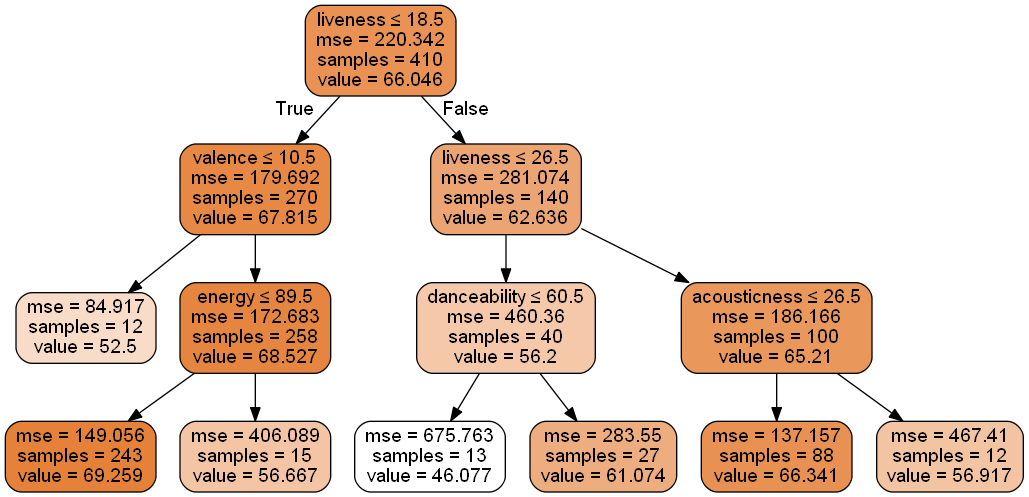

In [167]:
dot_data = StringIO()
export_graphviz(dtr_numeric_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_numeric.columns ,class_names=Y_numeric.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('popularity_dtr_numeric.png')
Image(graph.create_png())

In [190]:
# Building a random forest regression model using numeric attributes

grid_values = {'max_depth': [3,4,5], 'min_samples_leaf': [3,4,5,6,7,8,9,10], 'max_features': [1,2,3,4,5,6,7,8,9]}

X_train_rf_numeric, X_test_rf_numeric, Y_train_rf_numeric, Y_test_rf_numeric = train_test_split(X_numeric, Y_numeric, test_size=0.3, random_state=77)
rf_numeric = RandomForestRegressor()
rf_numeric_model = GridSearchCV(rf_numeric, grid_values)
rf_numeric_model.fit(X_train_rf_numeric, Y_train_rf_numeric)
rf_numeric_model.score(X_train_rf_numeric, Y_train_rf_numeric)

0.15736968508425753

In [169]:
# Best RMSE seen when taking into account all numeric attributes 

Y_pred_rf_numeric = rf_numeric_model.predict(X_test_rf_numeric)
rf_numeric_rmse = np.sqrt(mean_squared_error(Y_test_rf_numeric, Y_pred_rf_numeric))
rf_numeric_rmse

13.175435173832435

In [170]:
rf_numeric_model.best_params_

{'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 8}

In [191]:
# Building a gradient boosting regression model using numeric attributes

grid_values = {'max_depth': [3,4,5], 'max_features': [1,2,3,4,5,6,7,8,9]}

X_train_gb_numeric, X_test_gb_numeric, Y_train_gb_numeric, Y_test_gb_numeric = train_test_split(X_numeric, Y_numeric, test_size=0.3, random_state=77)
gb_numeric = GradientBoostingRegressor()
gb_numeric_model = GridSearchCV(gb_numeric, grid_values) 
gb_numeric_model.fit(X_train_gb_numeric, Y_train_gb_numeric)
gb_numeric_model.score(X_train_gb_numeric, Y_train_gb_numeric)                                

0.6304104591952502

In [172]:
Y_pred_gb_numeric = gb_numeric_model.predict(X_test_gb_numeric)
gb_numeric_rmse = np.sqrt(mean_squared_error(Y_test_gb_numeric, Y_pred_gb_numeric))
gb_numeric_rmse

14.29355815909252

In [173]:
gb_numeric_model.best_params_

{'max_depth': 5, 'max_features': 1}

In [192]:
# Building a kNN model using numeric attributes

X_numeric = preprocessing.normalize(X_numeric)
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

X_train_knn_numeric, X_test_knn_numeric, Y_train_knn_numeric, Y_test_knn_numeric = train_test_split(X_numeric, Y_numeric, test_size=0.3, random_state=77)
knn_numeric = KNeighborsRegressor()
knn_numeric_model = GridSearchCV(knn_numeric, params)
knn_numeric_model.fit(X_train_knn_numeric, Y_train_knn_numeric)
knn_numeric_model.score(X_train_knn_numeric, Y_train_knn_numeric)

0.15963809355509995

In [175]:
# kNN model also has low RMSE similar to Random Forest model 

Y_pred_knn_numeric = knn_numeric_model.predict(X_test_knn_numeric)
knn_numeric_rmse = np.sqrt(mean_squared_error(Y_test_knn_numeric, Y_pred_knn_numeric))
knn_numeric_rmse

13.40977665693119

In [176]:
knn_numeric_model.best_params_

{'n_neighbors': 9}